# 実験2

In [28]:
%matplotlib inline
import os
import os.path as osp
import re
import glob
from IPython.display import HTML

exp_dir = osp.abspath('../exp_results/')
par_dir = osp.abspath('../params/')


def play_video(exp_dir, scenario, n_epi, width=500, height=300):
    each_exp_dir = get_exp_dir(exp_dir, scenario)
    link_dir = osp.join('./videos', osp.basename(each_exp_dir))
    if not osp.lexists(link_dir):
        os.symlink(each_exp_dir, link_dir)
    fn_video = osp.join(link_dir, 'videos/video-%d.mp4' % n_epi)
    return _play_video(fn_video, width, height)

def _play_video(fn_video, width, height):
    print(fn_video)
    return HTML("""
    <video width="%d" height="%d" controls>
      <source src="%s" type="video/mp4">
    </video>""" % (width, height, fn_video))

def get_exp_dir(exp_dir, scenario):
    for fn in glob.glob(osp.join(exp_dir, '*')):
        if re.search(scenario + '__', fn):
            return fn


In [25]:
plt.rcParams['font.size'] = 14

def get_scenario_df(exp_dir, scenario, fn_rewards):
    each_exp_dir = get_exp_dir(exp_dir, scenario)
    fn_lc = osp.join(each_exp_dir, 'learning_curves', fn_rewards)
    df_lc = pd.read_csv(fn_lc, index_col=False)
#     df_lc = df_lc.dropna(axis='columns', how='all')
    return df_lc

def plot_lcs(fn_rewards, display_table=False):
    fn_scenarios = 'default_scenarios_cpu_setup1.dic'
    scenarios = eval(open(osp.join(par_dir, fn_scenarios)).read())['scenarios']
    
    fig, axes = plt.subplots(3, 3, figsize=(21, 16))
    axes = axes.flatten()
    for i, scenario in enumerate(scenarios):
        df_lc = get_scenario_df(exp_dir, scenario, fn_rewards)
        if display_table:
            display(df_lc.head(3))
        df_lc.plot(x='step', style='-o', fontsize=16, ax=axes[i], title=scenario, alpha=0.5)
    plt.tight_layout()
    
def plot_each_lc(scenario):
    fn_lcs = ['rewards.csv', 'agents_rewards.csv']
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    for i, fn_rew in enumerate(fn_lcs):
        df_lc = get_scenario_df(exp_dir, scenario, fn_rew)
        df_lc.plot(x='step', style='-o', fontsize=16, ax=axes[i], title=scenario, alpha=0.5)
   

In [19]:
from multiagent.environment import MultiAgentEnv
import multiagent.scenarios as scenarios

def action_space(scenario):
    fn = osp.join('../../../multiagent-particle-envs/multiagent/scenarios/%s.py' % scenario)
    scenario = scenarios.load(fn).Scenario()
    world = scenario.make_world()
    env = MultiAgentEnv(world, scenario.reset_world, scenario.reward, scenario.observation)
    print(env.action_space)

[Discrete(5), Discrete(5), Discrete(5), Discrete(5)]
None


None

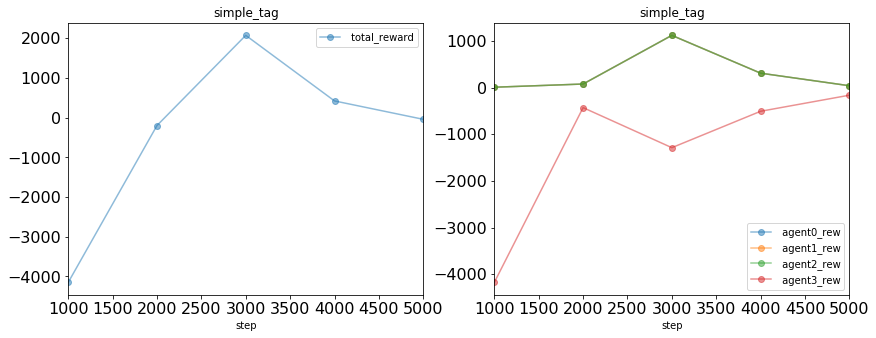

epi = 1000
./videos/simple_tag__2018-03-16-_09-49-25/videos/video-1000.mp4


epi = 3000
./videos/simple_tag__2018-03-16-_09-49-25/videos/video-3000.mp4


epi = 5000
./videos/simple_tag__2018-03-16-_09-49-25/videos/video-5000.mp4


In [29]:
scenario = 'simple_tag'
epis = [1000, 3000, 5000]

print(action_space(scenario))
display(plot_each_lc(scenario))
plt.show()

for epi in epis:
    print('epi = %d' % epi)
    display(play_video(exp_dir, scenario, n_epi = epi))

[<gym.spaces.multi_discrete.MultiDiscrete object at 0x11f08b588>, Discrete(5), Discrete(5), Discrete(5), Discrete(5), Discrete(5)]
None


None

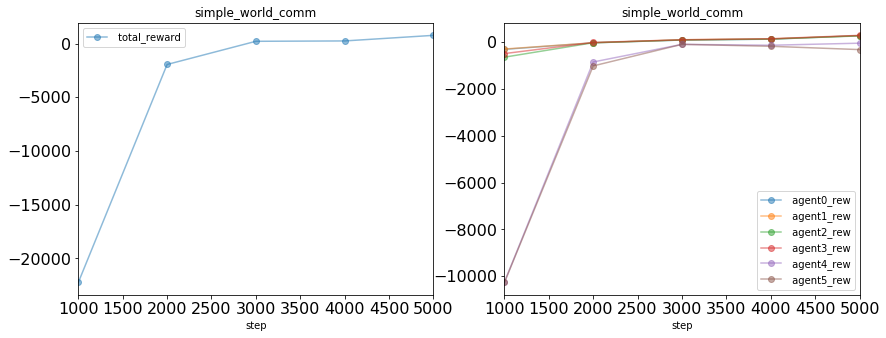

epi = 1000
./videos/simple_world_comm__2018-03-16-_11-23-33/videos/video-1000.mp4


epi = 3000
./videos/simple_world_comm__2018-03-16-_11-23-33/videos/video-3000.mp4


epi = 5000
./videos/simple_world_comm__2018-03-16-_11-23-33/videos/video-5000.mp4


In [31]:
scenario = 'simple_world_comm'
epis = [1000, 3000, 5000]

print(action_space(scenario))
display(plot_each_lc(scenario))
plt.show()

for epi in epis:
    print('epi = %d' % epi)
    display(play_video(exp_dir, scenario, n_epi = epi))